## Exploaring Handwritten Digits with Sklearn:

In [7]:
# Importing Libraries:

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
# Loading and visualizing the digits data:

digits = load_digits()

In [6]:
# Checking the shape of the 'digits' dataset:

digits.images.shape

(1797, 8, 8)

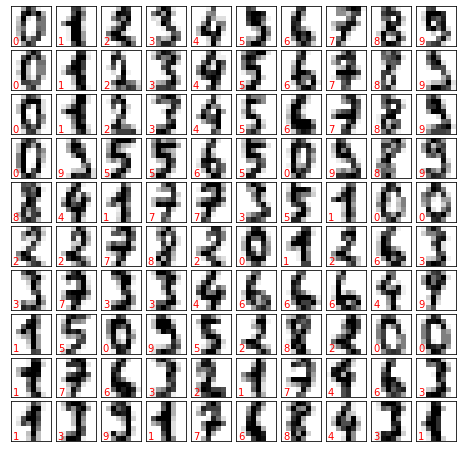

In [15]:
# Visualizing the first 100 images of the dataset:

fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'red')

In [16]:
# Splitting the 'digits' dataset into X and y segment:

X = digits.data
y = digits.target

In [17]:
# Checking the shape of the X and y data segments:

X.shape, y.shape

((1797, 64), (1797,))

## Unsupervised Learning: Dimensionality Reduction:

In [18]:
# Importing Libraries:

from sklearn.manifold import Isomap

In [19]:
# Transforming the data (X segment) in two dimensions:

iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

An Isomap embedding of the digits data


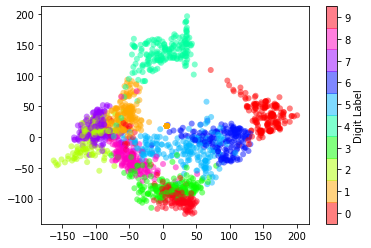

In [32]:
# Plotting the data in order to try learn something from its structure:

plt.scatter(data_projected[:, 0], data_projected[:, 1], 
            c = digits.target, 
            edgecolor = 'none', 
            alpha = 0.5,
            cmap = plt.cm.get_cmap('hsv', 10))
plt.colorbar(label = 'Digit Label', ticks = range(10))
plt.clim(-0.5, 9.5)
print('An Isomap embedding of the digits data')

## Clasification on Digits:

In [47]:
# Importing Libraries:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
# Splitting the 'digits' dataset on train and test segments:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [38]:
# Building GaussinaNB model object:

model = GaussianNB()

In [39]:
# Training the model:

model.fit(Xtrain, ytrain)

GaussianNB()

In [40]:
# Predicting with the model:

y_model = model.predict(Xtest)

In [43]:
# Checking the accuracy of the model predictions:

accuracy_score(ytest, y_model)

0.8333333333333334

A confusion matrix showing the frequendy of misclassifications by our classifier


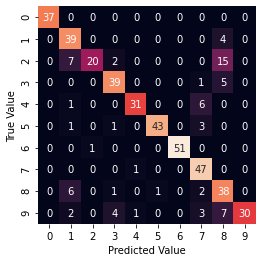

In [49]:
# Constructing confusion_matrix to inspect the results:

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
print('A confusion matrix showing the frequendy of misclassifications by our classifier')

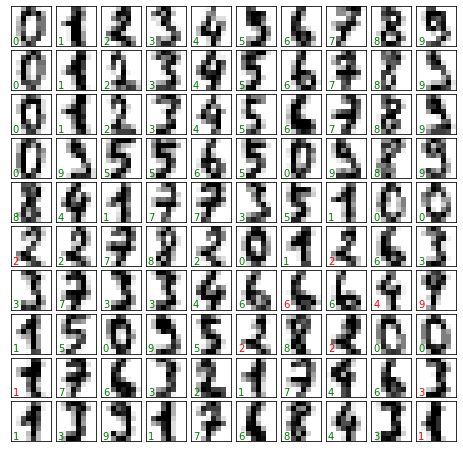

In [52]:
# Visualizing the first 100 images with True/False comparison (which are Green/Red):

fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green' if (ytest[i] == y_model[i]) else 'red')

## Hyperparameters and Model Validation:

- Choose a class of model.
- Choose model hyperparameters.
- Fit the model to the training data.
- Use the model to predict labels for new data.

## Model Validation the Wrong Way:

In [68]:
# Importing Libraries:

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [56]:
# Loading the 'iris' dataset:

iris = load_iris()

In [61]:
# Splitting 'iris' dataset into X (features) and y (target) segments:

X = iris.data
y = iris.target

In [63]:
# Checking the shapes of the X and y segments:

X.shape, y.shape

((150, 4), (150,))

In [65]:
# Building a KNN model object:

model = KNeighborsClassifier(n_neighbors = 1)

In [66]:
# Training the model:

model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [69]:
# Predicting with the model:

y_model = model.predict(X)

In [70]:
# Checking the accuracy of the model predictions:

accuracy_score(y, y_model)

1.0

- Here the 'flaw' is that the model train and validates on the same data. Thus, accuracy is 100%, but is incorrect.

## Model Validation the Right Way: Holdout Sets:

In [71]:
# Importing Libraries:

from sklearn.model_selection import train_test_split

In [72]:
# Splitting the dataset with train_test_split:

X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

In [73]:
# Training the model:

model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [75]:
# Evaluating the model on the second set of data:

y2_model = model.predict(X2)

In [76]:
# Checking the accuracy of the model predictions:

accuracy_score(y2, y2_model)

0.9066666666666666

## Model Validation Via Cross-Validation:

In [92]:
# Importing Libraries:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [77]:
# Two-fold Cross_Validation approach:

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [81]:
# Using the cross_val_score to split data for cross-validation:

cross_val_score(model, X, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [91]:
# Tring with cv = 10:

cross_val_score(model, X, y, cv = 10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [94]:
# Using the LeaveOneOut cross_validation:

scores = cross_val_score(model, X, y, cv = LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
# Taking the mean of the score:

scores.mean()

0.96